In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [9]:
data_df = pd.read_csv('data_k_mean.txt', sep=" ",header=None)
data=data_df.to_numpy()

In [10]:
data

array([[-7.87157, -4.86573],
       [-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

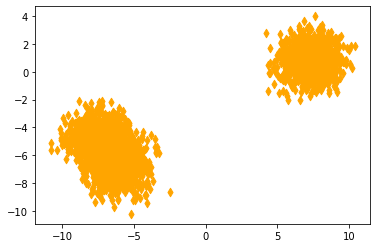

In [11]:
plt.scatter(data_df[0], data_df[1], c = 'orange', marker = 'd')
plt.show()

In [12]:
k = int(input("Enter the value of k : "))
np.random.seed(2021)
random_numbers = np.random.randint(low=0, high=len(data), size=(k,))
centroids = [data[random_numbers[i]] for i in range(k)]
print(centroids)

Enter the value of k : 5
[array([-5.98314, -4.23437]), array([-5.8905 , -7.38064]), array([5.59184, 2.3238 ]), array([8.14374, 1.1319 ]), array([-7.61229, -5.3289 ])]


In [13]:
distance = [] #to store the distance from point to classes
index_clusters = [-1 for i in range(len(data))] #to store class corresponding to index
count = 0 #to count the iteration number
clusters = {} #to store class numbers as keys and data points as values
# max 200 iterations
for x in range(500):
    count = x
    # flag to keep track whether change occurs or not
    flag = 0 
    for y in range(k):
        clusters[y] = []
    # iterate through each data points
    for i in range(len(data)):
        distance = []
        
        for j in range(k):
            dist = np.sqrt(pow(abs((data[i][0] - centroids[j][0])), 2) + pow(abs((data[i][1] - centroids[j][1])), 2))
            distance.append(dist)
            #print(distance)
        index = distance.index(min(distance))
        #print(index)
        # check whether the change occurs or not
        if index_clusters[i] != index:
            flag = 1
            index_clusters[i] = index
        clusters[index].append(data[i])
    # if change occurs
    if flag == 0:
        break
    # calculating new centroids
    centroids = [np.mean(np.asarray(clusters[z]), axis=0) for z in range(k)]

In [14]:
#variables to plot class 1 and class 2 data points
x1 = np.asarray(clusters[0])[:, 0]
y1 = np.asarray(clusters[0])[:, 1]


x2 = np.asarray(clusters[1])[:, 0]
y2 = np.asarray(clusters[1])[:, 1]

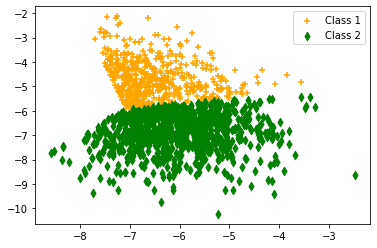

In [15]:
# plotting classified data points of two classes with different colored marker
plt.scatter(x1, y1, c = 'orange', marker = '+', label = 'Class 1')
plt.scatter(x2, y2, c = 'green', marker = 'd', label = 'Class 2')
plt.legend(loc = 'best')
plt.show()